In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *
import pandas as pd

Version 0.0.2


https://coronavirus.jhu.edu/map.html


http://91-divoc.com/pages/covid-visualization/


In [3]:
states=["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [4]:
class Data(object):
    
    def __init__(self):
        self.ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
        self.Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
        self.Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')        
        
        df=self.ConfirmedCases_raw
        self.I=pd.concat([ df[(df['Country/Region']=='US') & (df['Province/State']==state) ] for state in states], ignore_index=True)
        df=self.Deaths_raw
        self.X=pd.concat([ df[(df['Country/Region']=='US') & (df['Province/State']==state) ] for state in states], ignore_index=True)
        df=self.Recoveries_raw
        self.R=pd.concat([ df[(df['Country/Region']=='US') & (df['Province/State']==state) ] for state in states], ignore_index=True)        
        
    def __getitem__(self,key):
        datestrs=self.I.columns[4:]       
        
        dates=[]
        for date in datestrs:
            m,d,y=date.split('/')
            m=int(m)
            d=int(d)
            y=2000+int(y)

            dates.append(datetime.date(y,m,d))     

        s=Struct()
        s.dates=dates
        
        if key=='US' or key=='total':
            total=array(self.I)[:,4:].sum(axis=0).astype(int)
            s['I']=total
            total=array(self.X)[:,4:].sum(axis=0).astype(int)
            s['X']=total
            total=array(self.R)[:,4:].sum(axis=0).astype(int)
            s['R']=total
        else:
            total=array(self.I[self.I['Province/State']==key]).ravel()[4:].astype(int)
            s['I']=total
            total=array(self.X[self.X['Province/State']==key]).ravel()[4:].astype(int)
            s['X']=total
            total=array(self.R[self.R['Province/State']==key]).ravel()[4:].astype(int)
            s['R']=total

            
        return s
            

In [5]:
d=all_data=Data()
sorted_I=d.I.sort_values(by=d.I.columns[-1],ascending=False)
sorted_states=sorted_I['Province/State'].values
amounts=sorted_I[sorted_I.columns[-1]]
for i,(state,amount) in enumerate(zip(sorted_states,amounts)):
    print(i+1,state,amount)

1 New York 15793.0
2 Washington 1996.0
3 New Jersey 1914.0
4 California 1642.0
5 Illinois 1049.0
6 Michigan 1037.0
7 Louisiana 837.0
8 Florida 830.0
9 Massachusetts 646.0
10 Texas 627.0
11 Georgia 600.0
12 Pennsylvania 509.0
13 Tennessee 505.0
14 Colorado 476.0
15 Wisconsin 381.0
16 Ohio 355.0
17 North Carolina 302.0
18 Maryland 244.0
19 Connecticut 223.0
20 Virginia 221.0
21 Mississippi 207.0
22 Indiana 201.0
23 South Carolina 196.0
24 Nevada 190.0
25 Utah 181.0
26 Minnesota 169.0
27 Arkansas 165.0
28 Oregon 161.0
29 Arizona 152.0
30 Alabama 138.0
31 Missouri 100.0
32 Kentucky 99.0
33 Iowa 90.0
34 Maine 89.0
35 Rhode Island 83.0
36 Oklahoma 67.0
37 New Hampshire 65.0
38 Kansas 64.0
39 New Mexico 57.0
40 Vermont 52.0
41 Nebraska 51.0
42 Hawaii 48.0
43 Delaware 47.0
44 Idaho 42.0
45 Montana 31.0
46 North Dakota 28.0
47 Wyoming 24.0
48 South Dakota 21.0
49 Alaska 21.0
50 West Virginia 12.0


In [6]:
import ipywidgets as widgets

In [7]:
@widgets.interact(
    state=states+['US'])
def plotit(state='Rhode Island',confirmed=True,deaths=False,recovered=False,logscale=False):
    
    s=all_data[state]
    
    if not confirmed and not deaths and not recovered:
        confirmed=True
        
    if confirmed:
        plot(s.dates,s.I,'-o',label='Confirmed')
    if deaths:
        plot(s.dates,s.X,'-x',label='Deaths')
    if recovered:
        plot(s.dates,s.I,'-s',label='Recovered')

    legend()
        
    if logscale:
        gca().set_yscale('log')
            
    gcf().autofmt_xdate()
    title('%s' % state)    


interactive(children=(Dropdown(description='state', index=38, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

In [133]:
@widgets.interact(
    state=states+['US'])
def plotdoubletime(state='Rhode Island',window=4):
    
    s=all_data[state]
    
    I=s.I
    dates=s.dates
    new_dates=[]
    double_time=[]
    for i in range(window,len(I)):
        sub_I=I[i-window:i]
        new_dates.append(dates[i])


        if any(sub_I==0):
            double_time.append(np.nan)
        else:
            y=log(sub_I)
            x=range(window)

            m=polyfit(x,y,1)[0]
            double_time.append(log(2)/m)

    plot(new_dates,double_time,'-o')
    ylabel('Doubling Time [days]')
            
    gcf().autofmt_xdate()
    title('%s' % state)    


interactive(children=(Dropdown(description='state', index=38, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

In [97]:
populations=[4903185	,
731545	,
7278717	,
3017804	,
39512223	,
5758736	,
3565287	,
973764	,
705749	,
21477737	,
10617423	,
1415872	,
1787065	,
12671821	,
6732219	,
3155070	,
2913314	,
4467673	,
4648794	,
1344212	,
6045680	,
6892503	,
9986857	,
5639632	,
2976149	,
6137428	,
1068778	,
1934408	,
3080156	,
1359711	,
8882190	,
2096829	,
19453561	,
10488084	,
762062	,
11689100	,
3956971	,
4217737	,
12801989	,
1059361	,
5148714	,
884659	,
6829174	,
28995881	,
3205958	,
623989	,
8535519	,
7614893	,
1792147	,
5822434	,
578759	,]

In [99]:
from pyndamics import Simulation

pyndamics version  0.0.8


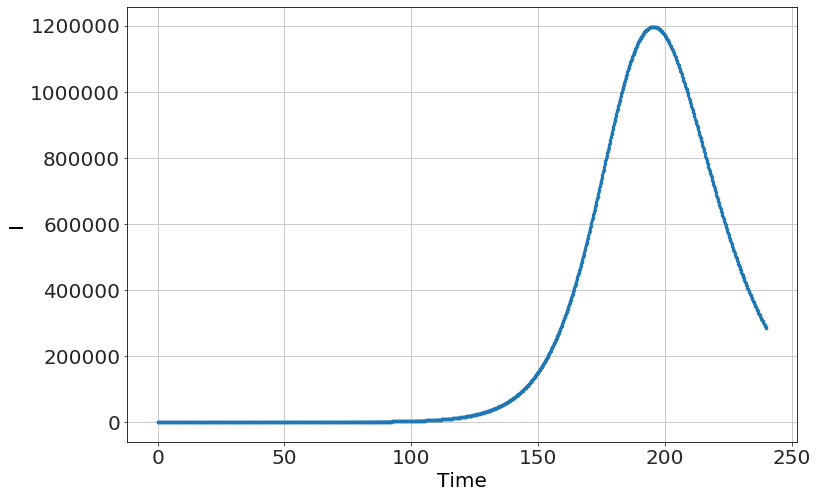

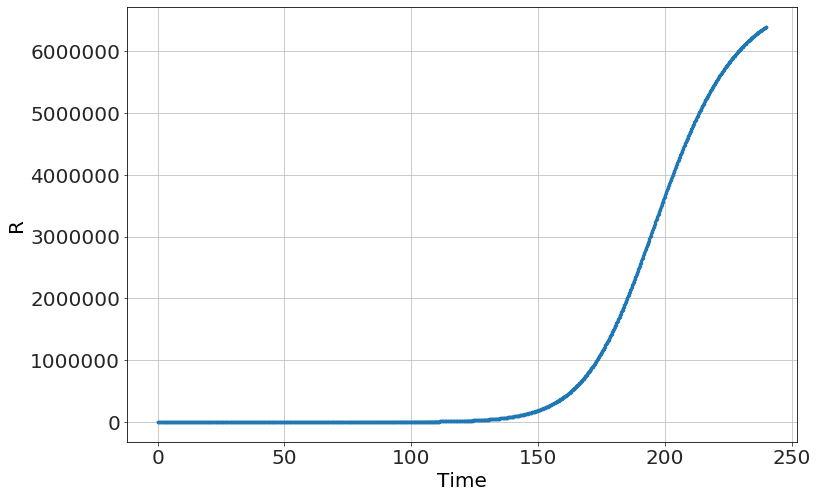

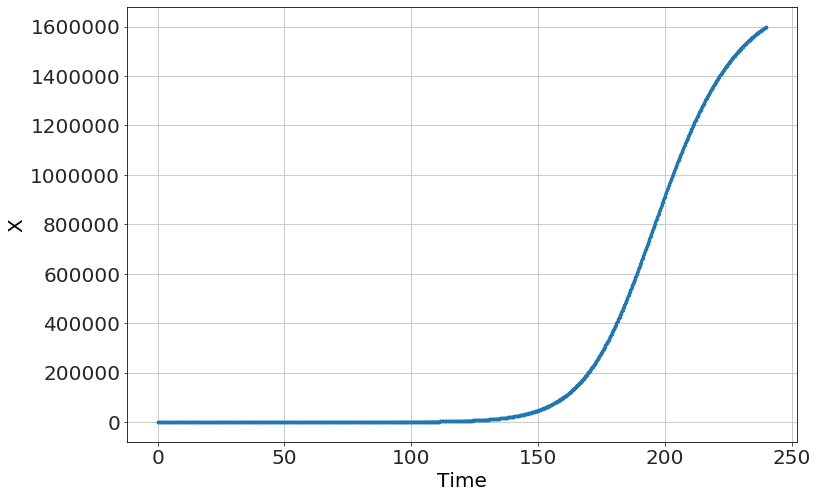

<Figure size 864x576 with 0 Axes>

In [105]:
state='Rhode Island'
S0=populations[states.index(state)]
sim=Simulation()
sim.add("N=S+I+R+X")
sim.add("S'=-β*S*I/N",S0)
sim.add("I'=+β*S*I/N-γ*I-γ2*I",1,plot=True)
sim.add("R'=+γ*I",0,plot=True)
sim.add("X'=+γ2*I",0,plot=True)
sim.params(β=.2,γ=4*24e-3,γ2=1*24e-3)
sim.run(10*24)

In [111]:
d['Rhode Island'].I

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  5,  5,
       14, 20, 20, 21, 23, 33, 44, 54, 66, 83])